# Exploratory Data Analysis  

In [53]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


## Load Data

- Read `weldb.data`
- Inspect first rows
- Check shape, data types

In [54]:
path_to_data = r'C:\Users\TALAE LOCAL\Desktop\weld-quality\data\welddb.data'
df = pd.read_csv(path_to_data, header=None , delim_whitespace=True,)

df.head()
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 44 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1652 non-null   float64
 1   1       1652 non-null   float64
 2   2       1652 non-null   float64
 3   3       1652 non-null   object 
 4   4       1652 non-null   object 
 5   5       1652 non-null   object 
 6   6       1652 non-null   object 
 7   7       1652 non-null   object 
 8   8       1652 non-null   object 
 9   9       1652 non-null   object 
 10  10      1652 non-null   object 
 11  11      1652 non-null   object 
 12  12      1652 non-null   object 
 13  13      1652 non-null   object 
 14  14      1652 non-null   object 
 15  15      1652 non-null   object 
 16  16      1652 non-null   object 
 17  17      1652 non-null   object 
 18  18      1652 non-null   object 
 19  19      1652 non-null   object 
 20  20      1652 non-null   object 
 21  21      1652 non-null   object 
 22  

C:\Users\TALAE LOCAL\AppData\Local\Temp\ipykernel_6124\3073955982.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(path_to_data, header=None , delim_whitespace=True,)


- Assign columns names (based on the WeldDB documentation https://www.phase-trans.msm.cam.ac.uk/map/data/materials/welddb-b.html#further )
- Keep an ordered list of names in a Python list

In [55]:

columns = [
    "C_pct",        # Column 1: Carbon concentration (wt%)
    "Si_pct",       # Column 2: Silicon concentration (wt%)
    "Mn_pct",       # Column 3: Manganese concentration (wt%)
    "S_pct",        # Column 4: Sulphur concentration (wt%)
    "P_pct",        # Column 5: Phosphorus concentration (wt%)
    "Ni_pct",       # Column 6: Nickel concentration (wt%)
    "Cr_pct",       # Column 7: Chromium concentration (wt%)
    "Mo_pct",       # Column 8: Molybdenum concentration (wt%)
    "V_pct",        # Column 9: Vanadium concentration (wt%)
    "Cu_pct",       # Column 10: Copper concentration (wt%)
    "Co_pct",       # Column 11: Cobalt concentration (wt%)
    "W_pct",        # Column 12: Tungsten concentration (wt%)
    "O_ppm",        # Column 13: Oxygen concentration (ppm)
    "Ti_ppm",       # Column 14: Titanium concentration (ppm)
    "N_ppm",        # Column 15: Nitrogen concentration (ppm)
    "Al_ppm",       # Column 16: Aluminium concentration (ppm)
    "B_ppm",        # Column 17: Boron concentration (ppm)
    "Nb_ppm",       # Column 18: Niobium concentration (ppm)
    "Sn_ppm",       # Column 19: Tin concentration (ppm)
    "As_ppm",       # Column 20: Arsenic concentration (ppm)
    "Sb_ppm",       # Column 21: Antimony concentration (ppm)
    "Current_A",    # Column 22: Current (A)
    "Voltage_V",    # Column 23: Voltage (V)
    "AC_DC",        # Column 24: AC or DC
    "Polarity",     # Column 25: Electrode polarity
    "HeatInput_kJmm", # Column 26: Heat input (kJ/mm)
    "InterpassTemp_C", # Column 27: Interpass temperature (°C)
    "WeldType",     # Column 28: Type of weld
    "PWHT_Temp_C",  # Column 29: Post weld heat treatment temperature (°C)
    "PWHT_Time_h",  # Column 30: Post weld heat treatment time (hours)
    "YieldStrength_MPa",  # Column 31
    "UTS_MPa",           # Column 32: Ultimate tensile strength (MPa)
    "Elongation_pct",    # Column 33: Elongation (%)
    "ReductionArea_pct", # Column 34: Reduction of Area (%)
    "CharpyTemp_C",      # Column 35: Charpy temperature (°C)
    "CharpyImpact_J",    # Column 36: Charpy impact toughness (J)
    "Hardness_kgmm2",    # Column 37
    "FATT50",            # Column 38: 50% FATT
    "FerritePrimary_pct",   # Column 39: Primary ferrite
    "FerriteSecond_pct",    # Column 40: Ferrite with 2nd phase
    "AcicularFerrite_pct",  # Column 41
    "Martensite_pct",       # Column 42
    "FerriteCarbide_pct",   # Column 43
    "WeldID"                # Column 44
]

# assign to dataframe
#adapt it to main  
df.columns = columns
df.head()


,C_pct,Si_pct,Mn_pct,S_pct,P_pct,Ni_pct,Cr_pct,Mo_pct,V_pct,Cu_pct,...,CharpyTemp_C,CharpyImpact_J,Hardness_kgmm2,FATT50,FerritePrimary_pct,FerriteSecond_pct,AcicularFerrite_pct,Martensite_pct,FerriteCarbide_pct,WeldID
0,0.037,0.30,0.65,0.008,0.012,0,N,N,N,N,...,N,N,N,N,N,N,N,N,N,Evans-Ni/CMn-1990/1991-0Aaw
1,0.037,0.30,0.65,0.008,0.012,0,N,N,N,N,...,-28,100,N,N,N,N,N,N,N,Evans-Ni/CMn-1990/1991-0Aawch
2,0.037,0.30,0.65,0.008,0.012,0,N,N,N,N,...,-38,100,N,N,N,N,N,N,N,Evans-Ni/CMn-1990/1991-0Aht
3,0.037,0.31,1.03,0.007,0.014,0,N,N,N,N,...,N,N,N,N,N,N,N,N,N,Evans-Ni/CMn-1990/1991-0Baw
4,0.037,0.31,1.03,0.007,0.014,0,N,N,N,N,...,-48,100,N,N,32,28,40,0,0,Evans-Ni/CMn-1990/1991-0Bawch


In [56]:
# copy paste from notebook .\weld-quality\data\load_and_push_to_hf.ipynb
text_columns = """
Column 1 is Carbon concentration / (weight%)

Column 2 is Silicon concentration / (weight%)

Column 3 is Manganese concentration / (weight%)

Column 4 is Sulphur concentration / (weight%)

Column 5 is Phosphorus concentration / (weight%)

Column 6 is Nickel concentration / (weight%)

Column 7 is Chromium concentration / (weight%)

Column 8 is Molybdenum concentration / (weight%)

Column 9 is Vanadium concentration / (weight%)

Column 10 is Copper concentration / (weight%)

Column 11 is Cobalt concentration / (weight%)

Column 12 is Tungsten concentration / (weight%)

Column 13 is Oxygen concentration / parts per million by weight

Column 14 is Titanium concentration / parts per million by weight

Column 15 is Nitrogen concentration / parts per million by weight

Column 16 is Aluminium concentration / parts per million by weight

Column 17 is Boron concentration / parts per million by weight

Column 18 is Niobium concentration / parts per million by weight

Column 19 is Tin concentration / parts per million by weight

Column 20 is Arsenic concentration / parts per million by weight

Column 21 is Antimony concentration / parts per million by weight

Column 22 is Current / A

Column 23 is Voltage / V

Column 24 is AC or DC

Column 25 is Electrode positive or negative

Column 26 is Heat input / kJmm-1

Column 27 is Interpass temperature / °C

Column 28 is Type of weld;

ShMA = MMA = manual metal arc,
SA = SMA = submerged arc,
FCA = flux cored arc,
GTAA gas tungsten arc automatic,
GMAA gas metal arc automatic,
SAW-NG = submerged arc narrow gap,
GMA-NG = gas metal arc narrow gap,
ES = electroslag and
TSA = tandem submerged arc.
Column 29 is Post weld heat treatment temperature / °C

Column 30 is Post weld heat treatment time / hours

Column 31 is Yield strength / MPa

Column 32 is Ultimate tensile strength / MPa

Column 33 is Elongation / %

Column 34 is Reduction of Area / %

Column 35 is Charpy temperature / °C

Column 36 is Charpy impact toughness / J

Column 37 is Hardness / kgmm-2

Column 38 is 50 % FATT

Column 39 is Primary ferrite in microstructure / %

Column 40 is Ferrite with second phase / %

Column 41 is Acicular ferrite / %

Column 42 is Martensite / %

Column 43 is Ferrite with carbide aggreagate / %

Column 44 is Weld ID"""


In [57]:
def extract_column_description(s):
    """
    Extracts the column description from a string like
    "Column 1 is Carbon concentration / (weight%)"
    and returns "Carbon concentration / (weight%)"
    """
    if " is " in s:
        return s.split(" is ", 1)[1]
    return s

In [58]:
columns_list = text_columns.strip().split("\n")
columns_list = [elt for elt in columns_list if elt.startswith("Column")]
df.columns = [extract_column_description(col) for col in columns_list]

## Cleaning 

- Replace N by None 
- Check NaN values or missing ones
- Check types of columns; conversion if needed


In [59]:
df = df.replace('N', None)

In [60]:
df.dtypes

Carbon concentration / (weight%)                         float64
Silicon concentration / (weight%)                        float64
Manganese concentration / (weight%)                      float64
Sulphur concentration / (weight%)                         object
Phosphorus concentration / (weight%)                      object
Nickel concentration / (weight%)                          object
Chromium concentration / (weight%)                        object
Molybdenum concentration / (weight%)                      object
Vanadium concentration / (weight%)                        object
Copper concentration / (weight%)                          object
Cobalt concentration / (weight%)                          object
Tungsten concentration / (weight%)                        object
Oxygen concentration / parts per million by weight        object
Titanium concentration / parts per million by weight      object
Nitrogen concentration / parts per million by weight      object
Aluminium concentration /

In [61]:
# based on the documentation only 4 features are categpricol
cat_cols = ['Weld ID', 'Type of weld;','AC or DC', 'Electrode positive or negative']
df[cat_cols].nunique()


Weld ID                           1490
Type of weld;                       10
AC or DC                             2
Electrode positive or negative       3
dtype: int64

In [62]:
for col in cat_cols:
    print(f"\nColonne: {col}")
    print(df[col].dropna().unique())  
    print("Nb unique:", df[col].nunique())



Colonne: Weld ID
['Evans-Ni/CMn-1990/1991-0Aaw' 'Evans-Ni/CMn-1990/1991-0Aawch'
 'Evans-Ni/CMn-1990/1991-0Aht' ... 'Birmingham-MAX37' 'Birmingham-MAX38'
 'Birmingham-MAX39']
Nb unique: 1490

Colonne: Type of weld;
['MMA' 'ShMA' 'FCA' 'SA' 'TSA' 'SAA' 'GTAA' 'GMAA' 'NGSAW' 'NGGMA']
Nb unique: 10

Colonne: AC or DC
['DC' 'AC']
Nb unique: 2

Colonne: Electrode positive or negative
['+' '0' '-']
Nb unique: 3


In [63]:
df["AC or DC"] = df["AC or DC"].map({"AC": 0, "DC": 1})
df["Electrode positive or negative"] = df["Electrode positive or negative"].map({"+": 1, "0": 0, "-": -1})

weldtype_map = {
    "MMA": 0,    # manual metal arc
    "ShMA": 1,   # variant of MMA
    "FCA": 2,    # flux cored arc
    "SA": 3,     # submerged arc
    "TSA": 4,    # tandem submerged arc
    "SAA": 5,    # another submerged arc variant
    "GTAA": 6,   # gas tungsten arc automatic
    "GMAA": 7,   # gas metal arc automatic
    "NGSAW": 8,  # narrow gap SAW
    "NGGMA": 9   # narrow gap GMA
}

df["Type of weld;"] = df["Type of weld;"].map(weldtype_map)


In [66]:
def clean_object_to_float(series):
   
    # Convert everything to string first
    s = series.astype(str).str.strip()

    # Replace decimal commas with dots
    s = s.str.replace(",", ".", regex=False)
    s = s.replace('None', np.nan)

    return pd.to_numeric(s, errors="coerce")


In [67]:

for col in df.select_dtypes(include="object").columns:
    df[col] = clean_object_to_float(df[col])


In [ ]:
path = r"../../../weldb_clean.csv"
df.to_csv(path, index=False)


## Statistic description

- Summary statistics
- Basic distributions

In [73]:

df.describe()

,Carbon concentration / (weight%),Silicon concentration / (weight%),Manganese concentration / (weight%),Sulphur concentration / (weight%),Phosphorus concentration / (weight%),Nickel concentration / (weight%),Chromium concentration / (weight%),Molybdenum concentration / (weight%),Vanadium concentration / (weight%),Copper concentration / (weight%),...,Charpy temperature / °C,Charpy impact toughness / J,Hardness / kgmm-2,50 % FATT,Primary ferrite in microstructure / %,Ferrite with second phase / %,Acicular ferrite / %,Martensite / %,Ferrite with carbide aggreagate / %,Weld ID
count,1652.000000,1652.000000,1652.000000,1641.000000,1642.000000,697.000000,784.000000,791.000000,620.000000,564.000000,...,879.000000,879.00000,80.000000,31.000000,96.000000,90.000000,90.000000,89.000000,89.000000,0.0
mean,0.075521,0.328577,1.202821,0.009561,0.012952,0.415034,2.101273,0.480358,0.072443,0.176188,...,-34.606371,87.68942,215.700000,-31.096774,19.552083,25.955556,52.833333,0.337079,0.438202,NaN
std,0.023898,0.112455,0.382137,0.011239,0.019627,0.786951,3.026548,0.477423,0.096364,0.325897,...,34.738624,50.11670,24.656321,43.644285,10.773134,21.283486,23.483798,3.179994,1.397685,NaN
min,0.029000,0.040000,0.270000,0.001000,0.002000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-114.000000,3.00000,154.000000,-126.000000,0.000000,3.000000,0.000000,0.000000,0.000000,NaN
25%,0.061750,0.270000,0.940000,0.006000,0.007000,0.000000,0.000000,0.000000,0.004000,0.000000,...,-60.000000,38.00000,193.750000,-62.000000,13.750000,9.000000,35.500000,0.000000,0.000000,NaN
50%,0.074000,0.320000,1.270000,0.007000,0.010000,0.067000,0.530000,0.340000,0.015000,0.030000,...,-40.000000,100.00000,221.000000,-15.000000,19.000000,18.000000,60.000000,0.000000,0.000000,NaN
75%,0.086000,0.360000,1.440000,0.010000,0.014000,0.260000,2.300000,1.010000,0.180000,0.190000,...,-17.500000,100.00000,231.000000,5.000000,24.000000,38.000000,71.750000,0.000000,0.000000,NaN
max,0.180000,1.140000,2.250000,0.140000,0.250000,3.500000,10.200000,1.500000,0.320000,1.630000,...,188.000000,270.00000,265.000000,30.000000,48.000000,100.000000,88.000000,30.000000,8.000000,NaN


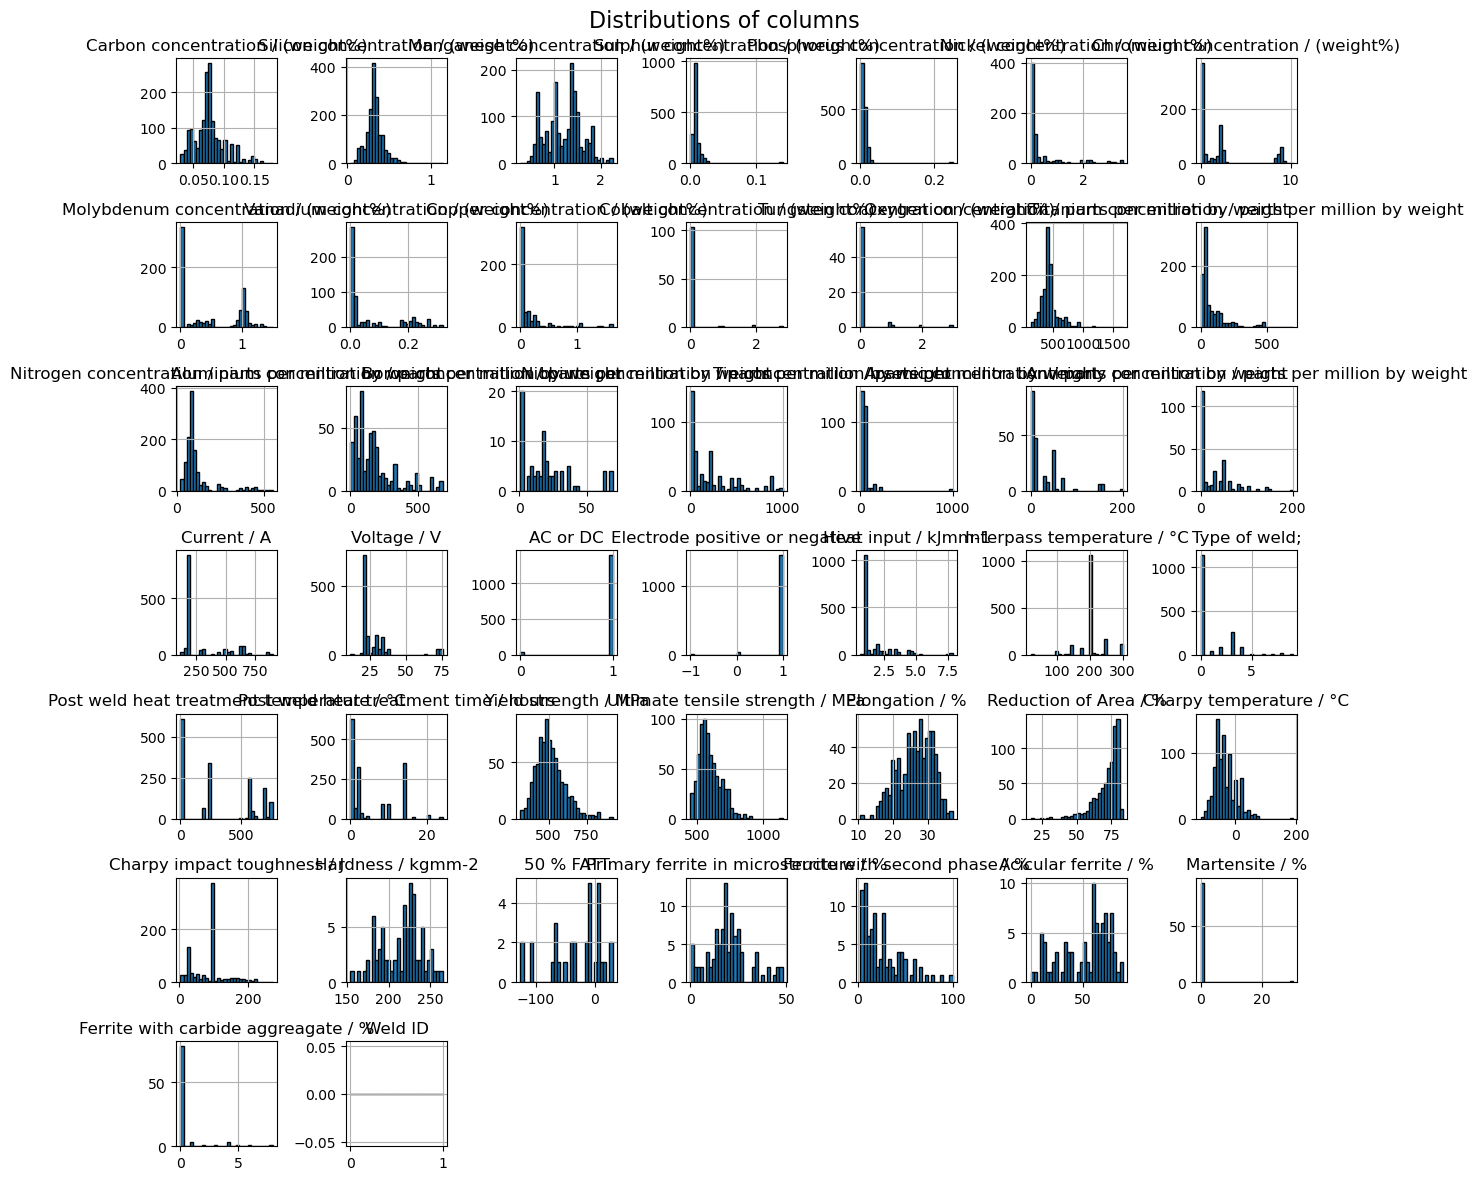

In [74]:
import matplotlib.pyplot as plt

df.hist(figsize=(12, 12), bins=30, edgecolor="black")
plt.suptitle("Distributions of columns", fontsize=16)
plt.tight_layout()
plt.show()
